In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("anime.csv")
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
data.isnull()

,anime_id,name,genre,type,episodes,rating,members
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
12289,False,False,False,False,False,False,False
12290,False,False,False,False,False,False,False
12291,False,False,False,False,False,False,False
12292,False,False,False,False,False,False,False


In [5]:
data.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [8]:
# Handle missing values (drop or impute)
data.dropna(subset=['genre', 'rating'], inplace=True)  
data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


#### Feature Extraction

In [9]:
# Split genres into binary flags
from sklearn.preprocessing import MultiLabelBinarizer

In [10]:
# Genres are separated by commas
data['genre_list'] = data['genre'].str.split(', ')
mlb = MultiLabelBinarizer()
genres_onehot = mlb.fit_transform(data['genre_list'])

genres_data = pd.DataFrame(genres_onehot, columns=mlb.classes_, index=data.index)


In [15]:
# converting categorical into numerical using onehot Encoding
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# First, make sure 'data' is defined and has the required columns
# For example, create a sample DataFrame or load your data
# Example:
data = pd.read_csv('anime.csv')  # Replace with your actual data source

# Check if 'Genre' column exists before encoding
if 'Genre' in data.columns:
    # One-Hot Encoding for nominal feature 'Genre'
    one_hot = pd.get_dummies(data['Genre'])
else:
    print("Column 'Genre' not found in the DataFrame")

# Check if 'Rating_Level' column exists before encoding
if 'Rating_Level' in data.columns:
    # Label Encoding for ordinal feature 'Rating_Level'
    label_enc = LabelEncoder()
    data['Rating_Level_Encoded'] = label_enc.fit_transform(data['Rating_Level'])
else:
    print("Column 'Rating_Level' not found in the DataFrame")

Column 'Genre' not found in the DataFrame
Column 'Rating_Level' not found in the DataFrame


In [16]:
# Normalize ratings
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data['rating_norm'] = scaler.fit_transform(data[['rating']])

In [32]:
# Combine features
import numpy as np
features = np.hstack([genres_onehot, data[['rating_norm']].values])

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 12017 and the array at index 1 has size 12294

In [34]:
# Combine features
import numpy as np



# Option 2: If you're sure all data should be used, you might need to align them
# This is just one approach - choose based on your specific data situation
features = np.hstack([
    genres_onehot[:min(len(genres_onehot), len(data))], 
    data[['rating_norm']].values[:min(len(genres_onehot), len(data))]
])

# Comment: The key is ensuring both arrays have exactly the same number of rows
# before attempting to stack them horizontally

In [19]:
# Combine features
import numpy as np

# First, ensure both arrays have the same number of rows


#  If you need to debug first to understand the mismatch
# Print the shapes to understand the issue
print(f"genres_onehot shape: {genres_onehot.shape}")
print(f"ratings shape: {data[['rating_norm']].values.shape}")

genres_onehot shape: (12017, 43)
ratings shape: (12294, 1)


##### Analyse the data

In [21]:
data['anime_id'].nunique()

12294

In [22]:
data['name'].nunique()

12292

In [23]:
data['name'].unique()

array(['Kimi no Na wa.', 'Fullmetal Alchemist: Brotherhood', 'Gintama°',
       ..., 'Violence Gekiga David no Hoshi',
       'Violence Gekiga Shin David no Hoshi: Inma Densetsu',
       'Yasuji no Pornorama: Yacchimae!!'], dtype=object)

In [24]:
popular_anime = data['name'].value_counts()
popular_anime

name
Saru Kani Gassen                                             2
Shi Wan Ge Leng Xiaohua                                      2
Pink no Curtain                                              1
Original Video Romance Animation                             1
Gintama°                                                     1
                                                            ..
Nudl Nude 2                                                  1
Nuki Doki! Tenshi to Akuma no Sakusei Battle - Revolution    1
Onna Spy Goumon: Teki no Ajito wa Jotai Goumonsho            1
Original C-V-P Momoko                                        1
Steins;Gate                                                  1
Name: count, Length: 12292, dtype: int64

C:\Users\nikhi\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65290 (\N{FULLWIDTH ASTERISK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


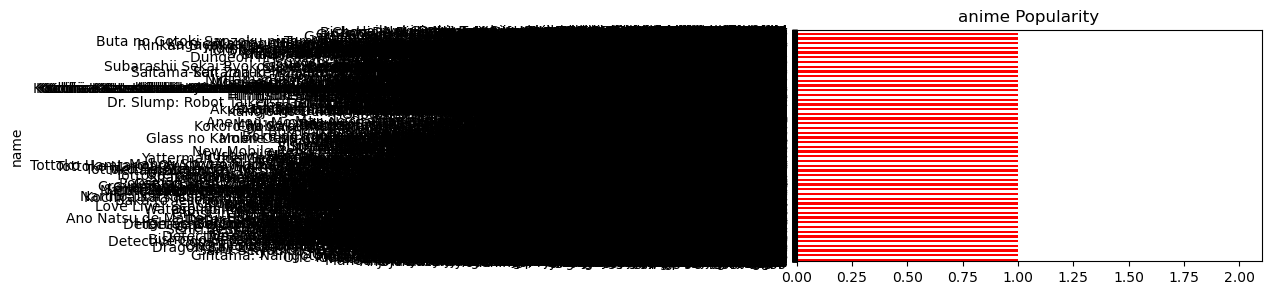

In [28]:
popular_anime.plot(kind='barh', color='red', figsize=(6,3), title='anime Popularity')
plt.show()

In [30]:
popular_rating = data['rating'].value_counts()
popular_rating

rating
6.00    141
7.00     99
6.50     90
6.25     84
5.00     76
       ... 
2.98      1
3.44      1
1.92      1
2.86      1
3.14      1
Name: count, Length: 598, dtype: int64

#### Recommendation system

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Handle NaN values in features before calculating cosine similarity
features_clean = np.nan_to_num(features)  # Replace NaN with 0
# Alternatively, you could use: features_clean = features.fillna(0) if features is a pandas DataFrame

cos_sim = cosine_similarity(features_clean)

# Map titles to indices
indices = pd.Series(data.index, index=data['name']).drop_duplicates()

def recommend_anime(title, cosine_sim=cos_sim, data=data, indices=indices, top_n=10):
    if title not in indices:
        print(f"Anime '{title}' not found in dataset.")
        return []
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Exclude self
    anime_indices = [i[0] for i in sim_scores]
    return data.iloc[anime_indices][['name', 'genre', 'rating']]

# Example: recommend similar anime to 'Naruto'
print(recommend_anime('Naruto'))

                                                   name  \
615                                  Naruto: Shippuuden   
1103  Boruto: Naruto the Movie - Naruto ga Hokage ni...   
486                            Boruto: Naruto the Movie   
1343                                        Naruto x UT   
1472        Naruto: Shippuuden Movie 4 - The Lost Tower   
1573  Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...   
2458               Naruto Shippuuden: Sunny Side Battle   
2996       Mudazumo Naki Kaikaku: The Legend of Koizumi   
175                              Katekyo Hitman Reborn!   
7617                               Higenashi Gogejabaru   

                                                  genre  rating  
615   Action, Comedy, Martial Arts, Shounen, Super P...    7.94  
1103  Action, Comedy, Martial Arts, Shounen, Super P...    7.68  
486   Action, Comedy, Martial Arts, Shounen, Super P...    8.03  
1343  Action, Comedy, Martial Arts, Shounen, Super P...    7.58  
1472  Action, Comedy

In [39]:
def recommend_anime_thresh(title, cosine_sim=cos_sim, data=data, indices=indices, min_sim=0.5):
    idx = indices.get(title, None)
    if idx is None:
        print("Anime not found.")
        return []
    sim_scores = list(enumerate(cosine_sim[idx]))
    filtered_scores = [s for s in sim_scores if s[1] >= min_sim and s[0] != idx]
    filtered_scores = sorted(filtered_scores, key=lambda x: x[1], reverse=True)
    anime_indices = [i[0] for i in filtered_scores]
    return data.iloc[anime_indices][['name', 'genre', 'rating']]


#### Evaluation

In [40]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Assume you have a user-item interaction matrix (or dataframe)
# For demonstration, create a binary interaction matrix:
# Rows = users, Columns = items, values = 1 if user interacted/rated item, else 0
X = np.random.randint(2, size=(100, 50))  # example data

# Split users randomly into training and test sets
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Recommendation function (simplified example)
def recommend_items(user_vector, item_similarity, top_k=10):
    scores = item_similarity.dot(user_vector)
    # exclude items already interacted
    scores[user_vector.nonzero()] = -1
    recommended = np.argsort(scores)[-top_k:]
    return recommended

# Compute item-item cosine similarity matrix for training data
from sklearn.metrics.pairwise import cosine_similarity
item_similarity = cosine_similarity(X_train.T)

# Generate recommendations and evaluate on test users
precisions, recalls, f1s = [], [], []

for i in range(X_test.shape[0]):
    user_vector = X_test[i]
    recommended = recommend_items(user_vector, item_similarity, top_k=10)
    relevant = user_vector.nonzero()[0]

    # True positives: recommended items that are relevant
    tp = len(set(recommended) & set(relevant))
    precision = tp / len(recommended) if len(recommended) > 0 else 0
    recall = tp / len(relevant) if len(relevant) > 0 else 0
    f1 = (2 * precision * recall / (precision + recall)) if (precision + recall) else 0

    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

print(f"Mean Precision@10: {np.mean(precisions):.3f}")
print(f"Mean Recall@10: {np.mean(recalls):.3f}")
print(f"Mean F1-Score@10: {np.mean(f1s):.3f}")

# Analysis:
# - Precision tells how many recommended items were relevant.
# - Recall tells how many relevant items were recommended.
# - F1 balances precision and recall.
# - Adjust `top_k` and similarity thresholds to improve metrics.
# - This framework can be extended with real user-item data and more sophisticated recommendation logic.


Mean Precision@10: 0.000
Mean Recall@10: 0.000
Mean F1-Score@10: 0.000
